Import essential libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Import data from file

In [ ]:
data_df = pd.read_csv( 'data/train.csv' )
data_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Evaluating Dataset

In [23]:
data_df.shape

(1460, 81)

Evaluating data

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

describing data_df dispersion

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


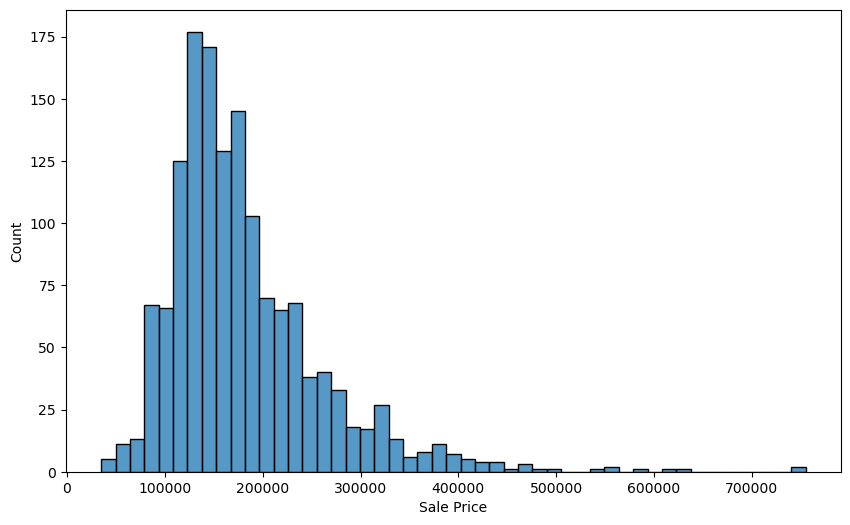

In [25]:
print( data_df.SalePrice.describe() )

plt.figure( figsize=(10,6) )
sns.histplot( data_df[ 'SalePrice' ] )
plt.xlabel( 'Sale Price' )
plt.ylabel( 'Count' )
plt.show()

Print missing values for each feature

In [26]:
na = data_df.isna().mean() * 100
na[ na > 0 ]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Remove columns with high missign values (Columns with more than 80% missing are pruned, the rest are filled with median (for numerical features), and mod (for categorical features) values)

In [27]:
# Remove high missing columns
missing_threshold = 0.8
high_missing_columns = data_df.columns[ data_df.isna().mean() > missing_threshold ]
data_df = data_df.drop( columns=high_missing_columns )
print( high_missing_columns )

# Fill in missing values
mode_values = data_df.mode().loc[ 0 ].to_dict()
print( f'Mode Values (for n/a filling): { mode_values } ')
median_values = data_df.median( numeric_only=True ).to_dict()
print(f' Median Values (for n/a filling): { median_values } ')

for column in data_df.columns:
  if data_df[ column ].isna().any():
    if data_df[ column ].dtype == 'object':
      data_df[ column ] = data_df[ column ].fillna( mode_values[ column ] )
    else:
      data_df[ column ] = data_df[ column ].fillna( median_values[ column ] )

data_df

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Mode Values (for n/a filling): {'Id': 1, 'MSSubClass': 20.0, 'MSZoning': 'RL', 'LotFrontage': 60.0, 'LotArea': 7200.0, 'Street': 'Pave', 'LotShape': 'Reg', 'LandContour': 'Lvl', 'Utilities': 'AllPub', 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm', 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 5.0, 'OverallCond': 5.0, 'YearBuilt': 2006.0, 'YearRemodAdd': 1950.0, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'VinylSd', 'Exterior2nd': 'VinylSd', 'MasVnrType': 'BrkFace', 'MasVnrArea': 0.0, 'ExterQual': 'TA', 'ExterCond': 'TA', 'Foundation': 'PConc', 'BsmtQual': 'TA', 'BsmtCond': 'TA', 'BsmtExposure': 'No', 'BsmtFinType1': 'Unf', 'BsmtFinSF1': 0.0, 'BsmtFinType2': 'Unf', 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 0.0, 'TotalBsmtSF': 0.0, 'Heating': 'GasA', 'HeatingQC': 'Ex', 'CentralAir': 'Y', 'Electrical': 'SBrkr', '1stFlrSF': 864.0, '2ndFlrSF'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Make sure there are no more missing values

In [28]:
na = data_df.isna().mean() * 100
print( na )
na[ na > 0 ]

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64


Series([], dtype: float64)

Remove outliers in the dataset

In [29]:
def iqr(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    mask = pd.Series(True, index=df.index)

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 2 * IQR
        upper = Q3 + 2 * IQR
        mask &= (df[col] >= lower) & (df[col] <= upper)

    return df[mask]

data_df = iqr( data_df )

Display all columns with categorical data

In [30]:
categorical_cols = data_df.select_dtypes( include=[ "object" ] ).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Show categorical columns with more than 10 unique values and remove them

In [31]:
for col in categorical_cols:
    if data_df[ col ].nunique() > 10:
        print( f"removed { col } column with { data_df[ col ].nunique() } unique values" )
        data_df.drop( columns=col, inplace=True )

removed Neighborhood column with 25 unique values
removed Exterior1st column with 11 unique values
removed Exterior2nd column with 13 unique values


/tmp/ipykernel_3441014/3985575650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3441014/3985575650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3441014/3985575650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop( columns=col, inplace=True )


Encoding categorical data using one-hot encoding (going for the safe option)

In [32]:
categorical_cols = data_df.select_dtypes( include=[ "object" ] ).columns
data_df = pd.get_dummies( data_df, columns=categorical_cols, drop_first=True, dtype=int )
data_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,1,0,0,0,1,0
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449,50,70.0,11767,4,7,1910,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,0,0,1,0,0,0,0,0,0,1
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,0,0,0,1,0,0,0,1,0


Normalize using z-score standardization

In [33]:
numerical_cols = data_df.select_dtypes( include=[ "number" ] ).columns.difference( [ 'SalePrice' ] )
df_mean = data_df[ numerical_cols ].mean()
df_std = data_df[ numerical_cols ].std()

non_zero_std = df_std[ df_std != 0 ].index
data_df[ numerical_cols ] = ( data_df[ numerical_cols ] - df_mean )
data_df[ non_zero_std ] = data_df[ non_zero_std ] / df_std[non_zero_std]
data_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.766234,0.192007,-0.177728,-0.200112,0.550842,-0.456065,0.800001,0.690238,0.889474,0.655794,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
2,-1.761459,0.192007,0.012406,0.712045,0.550842,-0.456065,0.723386,0.639406,0.614369,0.127612,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
4,-1.756684,0.192007,1.026454,1.692614,1.289138,-0.456065,0.685078,0.537741,2.135542,0.533351,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
6,-1.751908,-0.862443,0.456052,0.332197,1.289138,-0.456065,0.838308,0.791902,0.808561,2.247542,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
10,-1.742357,-0.862443,0.139162,0.695756,-0.925750,-0.456065,-0.655682,-1.241390,-0.696430,1.135959,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.691176,-0.071605,0.139162,0.880468,-1.664046,1.816202,-2.762591,0.537741,-0.696430,-1.039190,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992
1451,1.698339,-0.862443,0.646186,0.064413,1.289138,-0.456065,0.991538,0.995232,0.873292,-1.039190,...,-0.0533,-0.0533,2.833207,-0.0533,-2.362384,-0.0533,-0.0533,-0.100072,-2.062801,2.812972
1453,1.703114,-0.862443,1.406723,2.655917,-0.925750,-0.456065,0.914923,0.842735,-0.696430,-1.039190,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,-2.062801,-0.354992
1454,1.705502,-0.862443,-0.367862,-0.509594,0.550842,-0.456065,0.838308,0.791902,-0.696430,-0.054851,...,-0.0533,-0.0533,-0.352456,-0.0533,0.422701,-0.0533,-0.0533,-0.100072,0.484090,-0.354992


Split features and target

In [34]:
X = data_df.drop( columns=[ 'SalePrice' ] )
y = data_df[ 'SalePrice' ]

Split data into train and test subsets

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=10 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((564, 146), (564,), (141, 146), (141,))

Define RMSE, and Linear Regression function using Ridge Regularization (L2 regularization)

In [36]:
def f( X, w ):
    X = np.asarray( X )
    w = np.asarray( w )
    X_bias = np.hstack( ( np.ones( ( X.shape[0], 1 ) ), X ) )
    
    return X_bias @ w

def rmse( y_true, y_pred ):
    return np.sqrt( np.mean( ( y_true - y_pred ) ** 2 ) )

def gradient_descent( X, y, w, alpha, num_iters, lambda_ ):
    m = len( y )
    X = np.asarray( X )
    y = np.asarray( y )
    X_bias = np.hstack( ( np.ones( ( m, 1 ) ), X ) )

    for i in range( num_iters ):
        y_pred = X_bias @ w
        gradient = ( 1 / m ) * ( X_bias.T @ ( y_pred - y ) ) + lambda_ * np.r_[ 0, w[ 1: ] ]
        w -= alpha * gradient

    return w

w = np.zeros( X_train.shape[ 1 ] + 1 )

w_trained = gradient_descent( X_train, y_train, w, alpha=0.01, num_iters=1000, lambda_=0.25 )

y_test_pred = f( X_test, w_trained )
test_error = rmse( y_test, y_test_pred )

y_train_pred = f( X_train, w_trained )
train_error = rmse( y_train, y_train_pred )

print( "Train RMSE:", train_error )
print( "Test RMSE:", test_error )

Train RMSE: 17096.474053340782
Test RMSE: 20021.129402423812


Find best lambda for Ridge Regularization

In [37]:
lambda_list = [ 0.1, 0.25, 0.5, 0.75, 1.0 ]
for lam in lambda_list:
    w = np.zeros( X_train.shape[ 1 ] + 1 )
    w_trained = gradient_descent( X_train, y_train, w, alpha=0.01, num_iters=1000, lambda_=lam )
    
    train_rmse = rmse( y_train, f( X_train, w_trained ) )
    test_rmse = rmse( y_test, f( X_test, w_trained ) )
    
    print(f"lambda={lam:.2f}: Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

lambda=0.10: Train RMSE: 16073.55, Test RMSE: 23544.02
lambda=0.25: Train RMSE: 17096.47, Test RMSE: 20021.13
lambda=0.50: Train RMSE: 18494.64, Test RMSE: 20279.41
lambda=0.75: Train RMSE: 19619.59, Test RMSE: 20758.06
lambda=1.00: Train RMSE: 20588.87, Test RMSE: 21239.67


Calculating R2 score for the model and evaluating test set

In [38]:
def r2( y_true, y_pred ):
    SS_res = np.sum( np.square( y_true - y_pred ) )
    SS_tot = np.sum( np.square( y_true - np.mean( y_true ) ) )
    return 1 - SS_res / ( SS_tot )

error = r2( y_test, y_test_pred )
print( error )

0.8948427612293784


/tmp/ipykernel_3441014/1210925442.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_pred[ 'y_pred' ] = y_test_pred


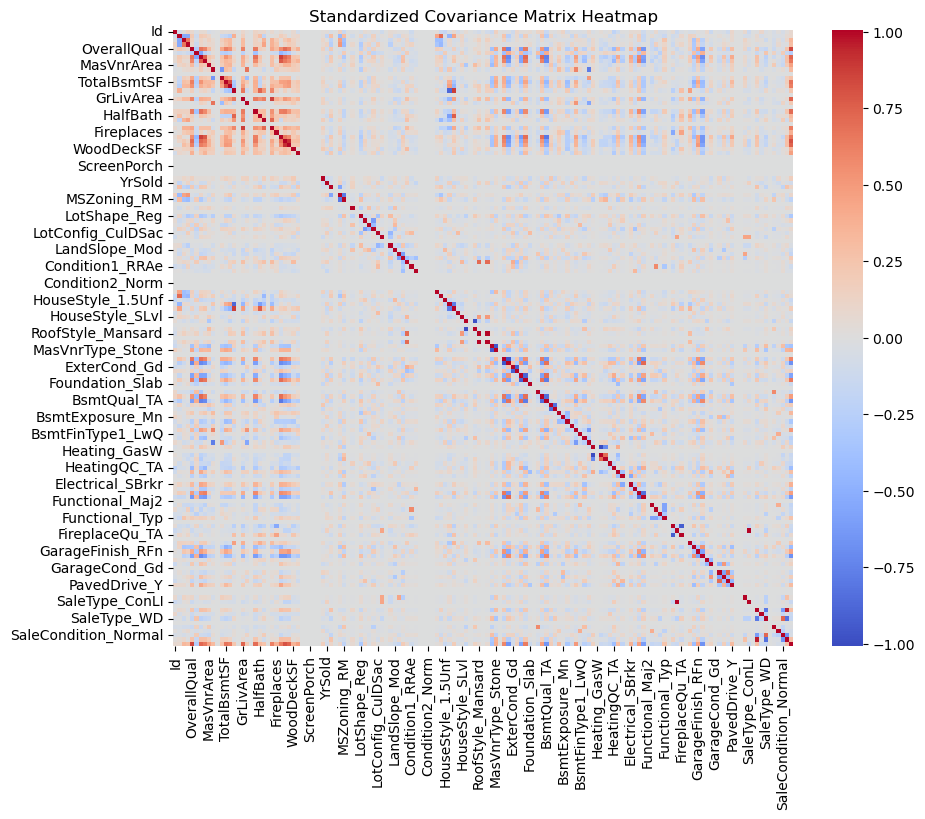

In [39]:
from sklearn.preprocessing import StandardScaler

test_pred = pd.DataFrame( X_test )
test_pred[ 'y_pred' ] = y_test_pred

scaler = StandardScaler()
standardized_data = scaler.fit_transform( test_pred )

standardized_df = pd.DataFrame( standardized_data, columns=test_pred.columns )
cov_matrix = standardized_df.cov()

plt.figure( figsize=( 10, 8 ) )
sns.heatmap( cov_matrix, cmap='coolwarm' )
plt.title( "Standardized Covariance Matrix Heatmap" )
plt.show()

Comparing my model to sklearn's LinearRegression model

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit( X_train, y_train )
y_test_pred = model.predict( X_test )

rmse_error = rmse( y_test, y_test_pred )
r2_error = r2( y_test, y_test_pred )

print( rmse_error )
print( r2_error )

21509.716881439082
0.87862439245507
